ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of ticklabels (135).

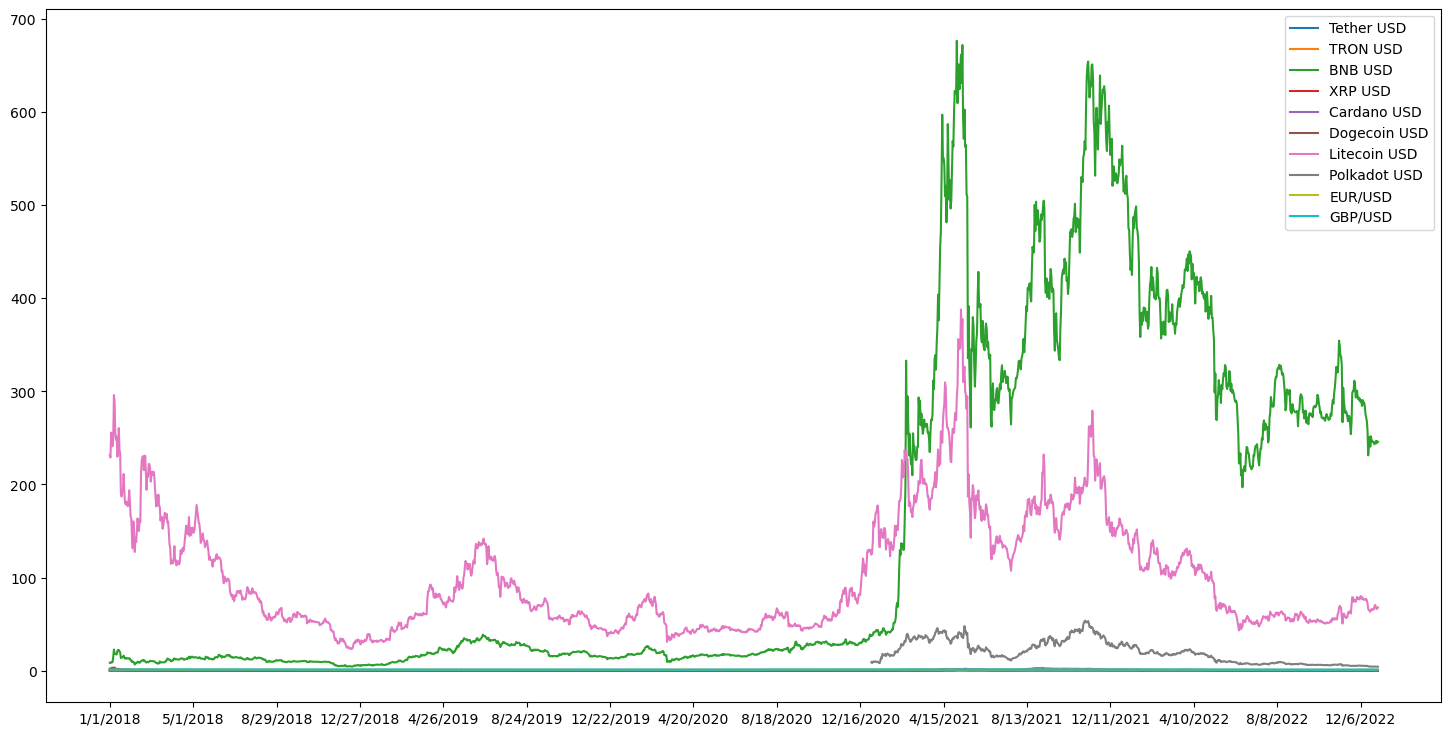

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv('crypto.csv')
mask = ~df['Type'].isin(['Bitcoin USD', 'Ethereum USD'])
df = df[mask]

# Graficar la evolución de los valores Open para cada valor Type
fig, ax = plt.subplots(figsize=(18,9))

for crypto_type in df['Type'].unique():
    crypto_df = df[df['Type'] == crypto_type]
    ax.plot(crypto_df['Date'], crypto_df['Open'], label=crypto_type)
    
# mostrar la leyenda
ax.legend()

tick_labels = ax.get_xticklabels()
ax.set_xticks(range(0, len(tick_labels), 120))
ax.set_xticklabels(df.iloc[::120]['Date'], rotation=45, fontsize=1)

# ajustar los ticks del eje y
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# configurar las etiquetas de los ejes y el título
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor de apertura')
ax.set_title('Evolución de los valores de apertura de criptomonedas')

# mostrar la figura
plt.show()

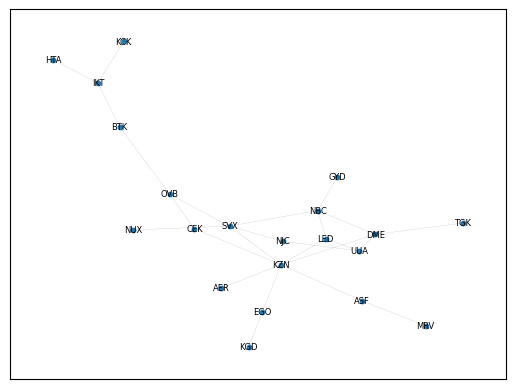

In [8]:
import networkx as nx

# Cargar el archivo routes.csv en un dataframe de pandas
routes_df = pd.read_csv("routes.csv")

# Crear el grafo vacío
G = nx.Graph()

# Agregar nodos al grafo (aeropuertos)
G.add_nodes_from(routes_df["source_airport"])
G.add_nodes_from(routes_df["destination_airport"])

# Agregar aristas al grafo (rutas)
for i, row in routes_df.iterrows():
    source = row["source_airport"]
    dest = row["destination_airport"]
    if G.has_edge(source, dest):
        # Si la arista ya existe, incrementar su peso
        G[source][dest]["weight"] += 1
    else:
        # Si la arista no existe, agregarla con peso 1
        G.add_edge(source, dest, weight=1)

# Configurar la posición de los nodos mediante el algoritmo de layout de grafos de fuerza
pos = nx.spring_layout(G)

# Dibujar el grafo
nx.draw_networkx(G, pos, with_labels=True, node_size=10, font_size=6, width=0.1, edge_color="grey")

# Mostrar el grafo
plt.show()

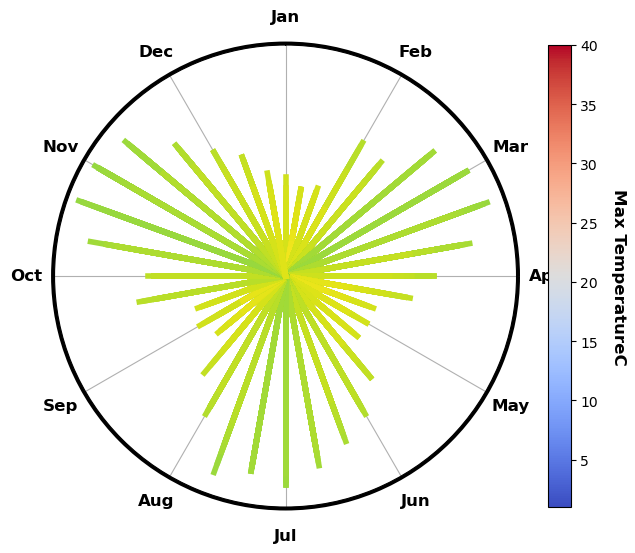

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import matplotlib.patheffects as mpe

# Carga del dataset
df = pd.read_csv("temperatura.csv")

# convertir la columna CET a datetime
df["CET"] = pd.to_datetime(df["CET"], format="%d/%m/%Y")

# calcular la columna fraction
df["fraction"] = (df["CET"].dt.year - df["CET"].dt.year.min() + (df["CET"].dt.month - 1) / 12) / (df["CET"].dt.year.max() - df["CET"].dt.year.min() + 1)

# Establecer parámetros de estilo
LINEWIDTH = 4
EDGEWIDTH = 1
CAPSTYLE = "projecting"
COLORMAP = "viridis_r"
ALPHA = 1

# Crear figura y ejes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="polar")

for i, row in df.iterrows():
    # Calcular la posición angular y radial correspondiente
    theta = row["fraction"] * 2 * np.pi
    radius = row["Max_TemperatureC"]
    
    # Dibujar la barra correspondiente
    ax.plot([theta, theta], [0, radius], lw=LINEWIDTH, color=plt.cm.get_cmap(COLORMAP)(radius), solid_capstyle=CAPSTYLE, alpha=ALPHA)
    
    # Aplicar efecto de trazo a la barra
    arc = ax.get_children()[-1]
    if EDGEWIDTH > 0:
        arc.set_path_effects([mpe.Stroke(linewidth=LINEWIDTH+EDGEWIDTH, foreground='black'), mpe.Normal()])

# Establecer las etiquetas de los ejes
ax.set_rticks([])
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=12, fontweight="bold")
ax.tick_params("x", pad=10)
ax.grid(True)

# agregar colorbar
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=df["Max_TemperatureC"].min(), vmax=df["Max_TemperatureC"].max()))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, fraction=0.045)
cbar.ax.set_ylabel("Max TemperatureC", rotation=270, labelpad=20, fontsize=12, fontweight="bold")

# guardar figura
plt.savefig("temperatura.png", dpi=300, bbox_inches="tight")
